# Question 01
-  Delivery_time -> Predict delivery time using sorting time 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("delivery_time.csv")

In [6]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


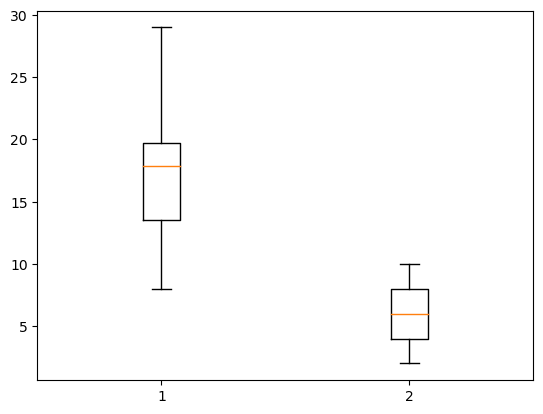

In [8]:
plt.boxplot(df)
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

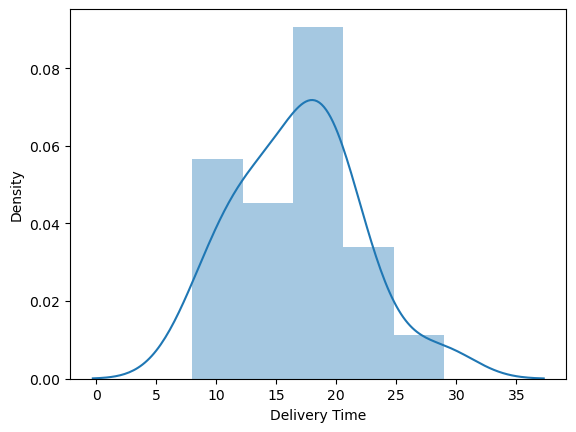

In [9]:
sns.distplot(df['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

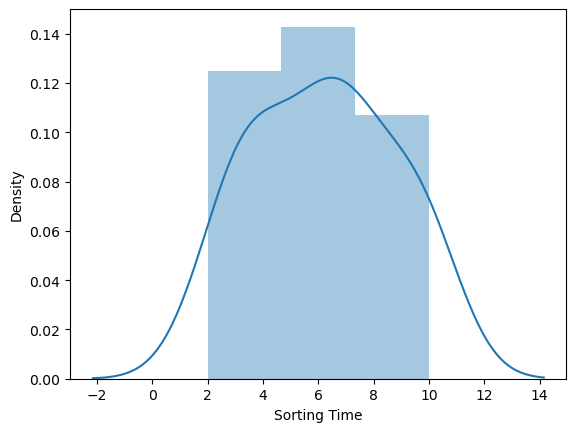

In [10]:
sns.distplot(df["Sorting Time"])

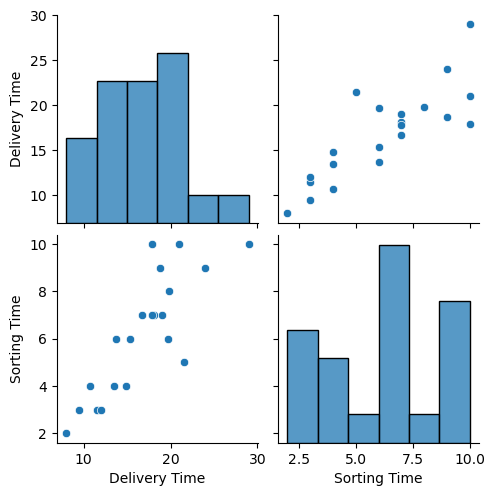

In [11]:
sns.pairplot(df)

In [12]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

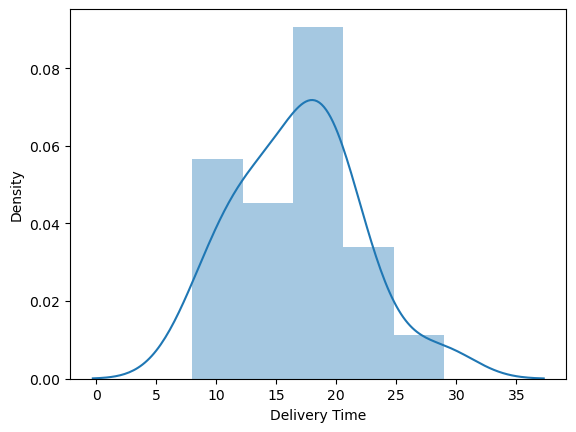

In [13]:
sns.distplot(df['Delivery Time'])

In [18]:
# Correlation

In [19]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

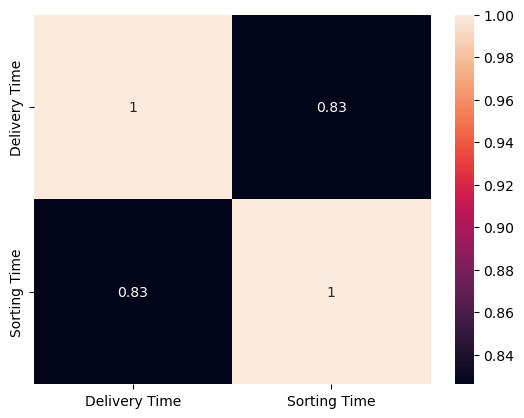

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [22]:
# Rename Function
df = df.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)

# Model building

In [23]:
import statsmodels.formula.api as smf

In [24]:
model = smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [25]:
#Model parameters

In [26]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [27]:
model.rsquared

0.6822714748417231

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        16:18:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Prediction for Delivery Time

In [30]:
NewData = pd.Series([10,15])
Data_Pred = pd.DataFrame(NewData,columns=["Sorting_Time"])
Data_Pred

,Sorting_Time
0,10
1,15


In [31]:
model.predict(Data_Pred)

0    23.072933
1    31.318032
dtype: float64

# Model 2

In [32]:
# Applying Log Transformation on the independent variable

In [33]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data =df).fit()

In [34]:
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        16:19:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3

In [36]:
# Constructing a new model, by applying Squredroot transformation

In [37]:
model3 = smf.ols('Delivery_Time~np.sqrt(Sorting_Time)',data =df).fit()

In [38]:
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        16:22:39   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 02
- Salary_hike -> Build a prediction model for Salary_hike

In [40]:
Sal = pd.read_csv("Salary_Data.csv")

In [41]:
Sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [42]:
Sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
Sal['YearsExperience'].skew()

0.37956024064804106

In [44]:
Sal["Salary"].skew()

0.35411967922959153

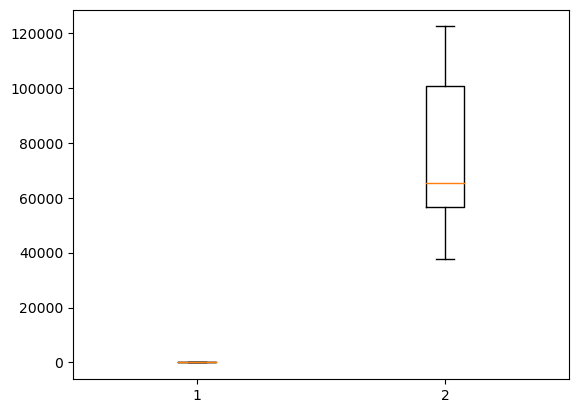

In [45]:
plt.boxplot(Sal)
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

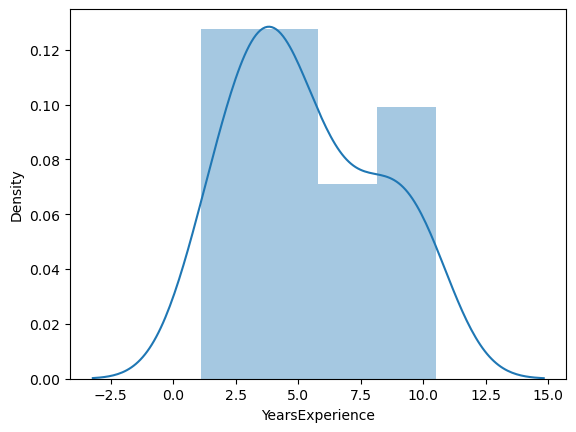

In [46]:
sns.distplot(Sal['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

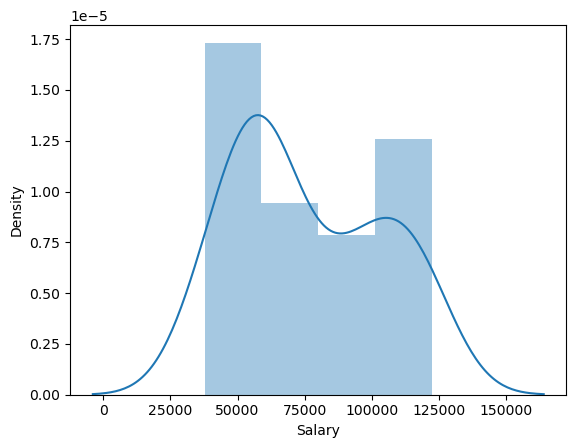

In [47]:
sns.distplot(Sal['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

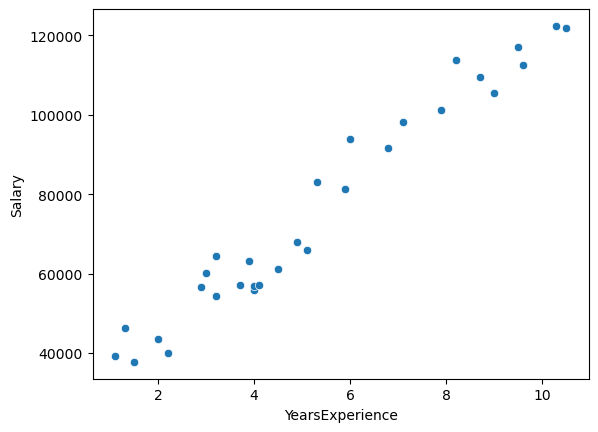

In [48]:
sns.scatterplot(Sal['YearsExperience'],Sal["Salary"])

In [50]:
Sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [51]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [52]:
sc = StandardScaler()

In [55]:
import statsmodels.formula.api as smf

In [56]:
modelSal = smf.ols("Salary~YearsExperience",data = Sal).fit()

In [57]:
#Model parameters

In [58]:
modelSal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [59]:
modelSal.rsquared

0.9569566641435086

In [60]:
modelSal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        16:24:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model 2
- Creating a new model,by applying Logarithmic Transformation

In [63]:
modelSal2 = smf.ols("Salary~np.log(YearsExperience)",data = Sal).fit()

In [64]:
modelSal2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        16:28:32   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
modelSal3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

# Model 3
- Creating an new model, by Taking squrareroot Transformation

In [65]:
modelSal3 = smf.ols("Salary~np.sqrt(YearsExperience)",data = Sal).fit()

In [66]:
modelSal3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        16:31:25   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
modelSal3.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [54]:
#line equation
x = 10.5
y = 1.64*x + 6.58
y

23.799999999999997

In [55]:
newdata=pd.Series([7,10.5])
data_pred =pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

,YearsExperience
0,7.0
1,10.5


In [56]:
modelSal.predict(data_pred)

0    632.956554
1    897.650816
dtype: float64